In [1]:
import keras
from keras.models import Sequential
from PIL import Image
import numpy as np

Using Theano backend.


In [2]:
import gzip
import pickle
with gzip.open("../Week02/mnist.pkl.gz", 'rb') as f:
    train_set, validation_set, test_set = pickle.load(f, encoding='latin1')
train_X, train_y = train_set
validation_X, validation_y = validation_set
test_X, test_y = test_set


train_Y = np.eye(10)[train_y]
test_Y = np.eye(10)[test_y]
validation_Y = np.eye(10)[validation_y]

# or
# from keras.datasets import mnist
# from keras.utils import np_utils
# (train_X, train_y), (test_X, test_y) = mnist.load_data()
# train_Y = np_utils.to_categorical(train_y, 10)
# test_Y = np_utils.to_categorical(test_y, 10)

### logistic regression

In [3]:
from keras.layers import Dense, Activation
model = Sequential()
model.add(Dense(units=10, input_dim=784))
model.add(Activation('softmax'))

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

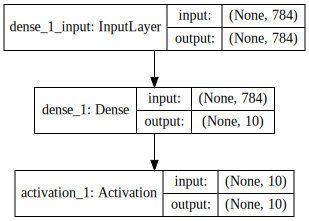

In [5]:
from IPython.display import SVG, display
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [6]:
model.fit(train_X, train_Y, validation_data=(validation_X, validation_Y), batch_size=128, epochs=15)

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 0s - loss: 1.4028 - acc: 0.6622 - val_loss: 0.8777 - val_acc: 0.8333
Epoch 2/15
50000/50000 [==============================] - 0s - loss: 0.7834 - acc: 0.8297 - val_loss: 0.6381 - val_acc: 0.8631
Epoch 3/15
50000/50000 [==============================] - 0s - loss: 0.6352 - acc: 0.8520 - val_loss: 0.5440 - val_acc: 0.8751
Epoch 4/15
50000/50000 [==============================] - 0s - loss: 0.5642 - acc: 0.8625 - val_loss: 0.4922 - val_acc: 0.8823
Epoch 5/15
50000/50000 [==============================] - 0s - loss: 0.5212 - acc: 0.8697 - val_loss: 0.4588 - val_acc: 0.8870
Epoch 6/15
50000/50000 [==============================] - 0s - loss: 0.4917 - acc: 0.8744 - val_loss: 0.4358 - val_acc: 0.8905
Epoch 7/15
50000/50000 [==============================] - 0s - loss: 0.4699 - acc: 0.8780 - val_loss: 0.4183 - val_acc: 0.8933
Epoch 8/15
50000/50000 [==============================] - 0s 

In [7]:
# 預測看看 test_X 前 20 筆
model.predict_classes(test_X[:20])

20/20 [==============================] - 0s


array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [8]:
# 對答案
test_y[:20]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

In [9]:
# 看看 test accuracy
model.evaluate(test_X, test_Y)

 8384/10000 [========================>.....] - ETA: 0s

[0.36257555615901949, 0.9032]

## Q 
* 將 `optimizer` 換成 `"adam"`
* 將 `optimizer` 換成 `keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)`

### 建立  convolutional model
我們之前的網路架構
* convolution 2d kernel=(3,3), filters=32
* relu
* max pool
* convolution 2d kernel=(3,3), filters=64
* relu
* max pool
* dense units=1024
* relu
* dropout (rate=0.8) # 先省略這一層
* dense units = 10
* softmax

試著架出這樣的網路

然後訓練看看

開頭幾行可以這樣寫
```python
from keras.layers import Dense, Activation, Conv2D, MaxPool2D, Reshape
model = Sequential()
model.add(Reshape((28, 28, 1), input_shape=(784,) ))
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation="relu"))
```

In [10]:
# 參考答案
#%load q_keras_cnn.py